In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
def evaluateBinaryClassification(predictions, actuals):
    contigency = pd.crosstab(actuals,predictions)
    TP = contigency[1][1]
    TN = contigency[0][0]
    FP = contigency[1][0]
    FN = contigency[0][1]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    FScore = 2*Recall*Precision/(Recall+Precision)
    
    
    return Acuracy, Recall, Precision, FScore
    

In [3]:
Methods = ['Random','KNN','NB','DT']
Metrics = ['Accuracy','Recall','Precision','Fscore']

compare_df = pd.DataFrame(index = Methods, columns = Metrics)

In [4]:
# Load data
df = pd.read_csv('NN/diabetes_data.csv')

In [5]:
# Split data into X (predictors) and y (target)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=5)
mlp.fit(X_train, y_train)
y_predict_mlp = mlp.predict(X_test)

In [8]:
compare_df.loc['MLP'] = evaluateBinaryClassification(y_predict_mlp,y_test)
compare_df

,Accuracy,Recall,Precision,Fscore
Random,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
NB,NaN,NaN,NaN,NaN
DT,NaN,NaN,NaN,NaN
MLP,0.864357,0.15994,0.545162,0.24732


In [9]:
print('MLP Method number of yes prediction: {}'.format(np.sum(y_predict_mlp==1)))

MLP Method number of yes prediction: 3111


In [10]:
### Tune MLP

In [11]:
import warnings

warnings.filterwarnings("ignore")

In [12]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

param_grid = {
    'hidden_layer_sizes':[5],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate':['constant','invscaling','adaptive']}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring=['recall','f1'],refit='f1',verbose=2)
gridSearch.fit(X_train, y_train.replace({'yes':1,'no':0}))
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 36 candidates, totalling 36 fits
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=lbfgs; total time=   3.5s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=sgd; total time=   5.5s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=adam; total time=   3.4s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=lbfgs; total time=   3.3s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=sgd; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=adam; total time=   3.8s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, solver=lbfgs; total time=   3.4s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, solver=sgd; total time=   8.3s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=ada

In [14]:
param_grid = {
    'hidden_layer_sizes':[5,10,15,(5,5),(5,10)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate':['adaptive']
}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring='recall',verbose=2)
gridSearch.fit(X_train, y_train.replace({'yes':1,'no':0}))
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=adaptive, solver=adam; total time=   3.9s
[CV] END activation=tanh, hidden_layer_sizes=10, learning_rate=adaptive, solver=adam; total time=   2.8s
[CV] END activation=tanh, hidden_layer_sizes=15, learning_rate=adaptive, solver=adam; total time=   4.8s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10), learning_rate=adaptive, solver=adam; total time=   5.0s
Score:  0.14768861316790075
Parameters:  {'activation': 'tanh', 'hidden_layer_sizes': 10, 'learning_rate': 'adaptive', 'solver': 'adam'}


In [15]:
param_grid = {
    'hidden_layer_sizes':[5,10,15,(5,5),(5,10)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0,0.0005,0.0001,0.0005,0.001],
    'learning_rate':['adaptive'],
    'learning_rate_init': [0,0.0001,0.0005,0.001, 0.005,0.01],
    'max_iter': [200,500],
    'shuffle': [True,False] 
}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring='recall',verbose=2)
gridSearch.fit(X_train, y_train.replace({'yes':1,'no':0}))
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 600 candidates, totalling 600 fits
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0, max_iter=200, shuffle=True, solver=adam; total time=   0.0s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0, max_iter=200, shuffle=False, solver=adam; total time=   0.0s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0, max_iter=500, shuffle=True, solver=adam; total time=   0.0s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0, max_iter=500, shuffle=False, solver=adam; total time=   0.0s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=   9.4s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0001, max_ite

[CV] END activation=tanh, alpha=0, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=   8.9s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   4.9s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=   8.6s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   3.9s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   5.5s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=False, solver=adam; to

[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   7.5s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=13.8min
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   7.3s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   5.1s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=False, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0005, max_iter=500,

[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=   6.8s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   5.7s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   5.3s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=False, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=500,

[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   8.2s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=   9.7s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   6.8s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   5.2s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=False, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_in

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=  10.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   5.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=   7.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   6.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   4.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffl

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=   7.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=   7.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   4.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   5.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, 

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=  14.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   8.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=  10.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   9.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   4.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_ra

[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=   8.7s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   4.5s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=   9.0s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   5.3s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   6.2s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, 

[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=  13.0s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   6.7s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=   9.9s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   6.1s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   4.7s
[CV] END activation=tanh, alpha=0.0005, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_ini

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=   7.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   6.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=   7.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   5.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   5.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=5, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=Fals

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=   9.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   4.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=   5.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   6.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=15, learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffl

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=  11.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=200, shuffle=False, solver=adam; total time=   9.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=True, solver=adam; total time=  14.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, shuffle=False, solver=adam; total time=  11.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_init=0.0005, max_iter=200, shuffle=True, solver=adam; total time=   6.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), learning_rate=adaptive, learning_rate_ini

In [16]:
X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train,
                                                        test_size=0.2)
for i in range(15):
    mlp = MLPClassifier(hidden_layer_sizes=5,activation='tanh',
                        learning_rate='adaptive', solver='adam',
                        random_state=i)
    
    mlp.fit(X_train_s, y_train_s)
    y_predict_mlp = mlp.predict(X_tune)
    print(i,evaluateBinaryClassification(y_predict_mlp,y_tune))     

0 (0.8674118707061605, 0.14387609537395557, 0.5815485996705108, 0.2306812612318249)
1 (0.8665953373127604, 0.10841654778887304, 0.5944134078212291, 0.18338503964150293)
2 (0.864061268160829, 0.05706134094151213, 0.5821205821205822, 0.10393466963622866)
3 (0.8629068588805046, 0.02465865090686774, 0.5931372549019608, 0.04734885540990022)
4 (0.8649904268498705, 0.12451599755451397, 0.5504504504504505, 0.20309124148246638)
5 (0.867608964973533, 0.13348277970246586, 0.5927601809954751, 0.21789753825681968)
6 (0.8673274017344296, 0.10291420419808436, 0.6196319018404908, 0.17651170919259)
7 (0.8635262980065322, 0.05094762584063583, 0.5681818181818182, 0.09351037965214139)
8 (0.8628505462326839, 0.04238842469940901, 0.5473684210526316, 0.07868356345753737)
9 (0.8645399256673049, 0.06908498063990218, 0.5824742268041238, 0.12351976680633993)
10 (0.8672147764387882, 0.13857754228652944, 0.58169375534645, 0.2238314680710994)
11 (0.8644836130194842, 0.13857754228652944, 0.5371248025276462, 0.220314

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=5,activation='relu',
                        learning_rate='invscaling', solver='adam',
                        random_state=13)

mlp.fit(X_train_s, y_train_s)
y_predict_mlp = mlp.predict(X_test)
compare_df.loc['MLP'] = evaluateBinaryClassification(y_predict_mlp,y_test)
compare_df

,Accuracy,Recall,Precision,Fscore
Random,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
NB,NaN,NaN,NaN,NaN
DT,NaN,NaN,NaN,NaN
MLP,0.865382,0.140985,0.568225,0.225916


In [19]:
# print('Random Method number of yes prediction: {}'.format(np.sum(y_predict_random==1)))
# print('KNN Method number of yes prediction: {}'.format(np.sum(y_predict_knn==1)))
# print('NB Method number of yes prediction: {}'.format(np.sum(y_predict_nb==1)))
# print('DT Method number of yes prediction: {}'.format(np.sum(y_predict_dt==1)))
print('MLP Method number of yes prediction: {}'.format(np.sum(y_predict_mlp==1)))

MLP Method number of yes prediction: 2631


In [20]:
roc_auc = roc_auc_score(y_test, y_predict_mlp)

In [21]:
print("ROC AUC:", roc_auc)

ROC AUC: 0.5618205113438397


In [22]:
confusion = confusion_matrix(y_test, y_predict_mlp)

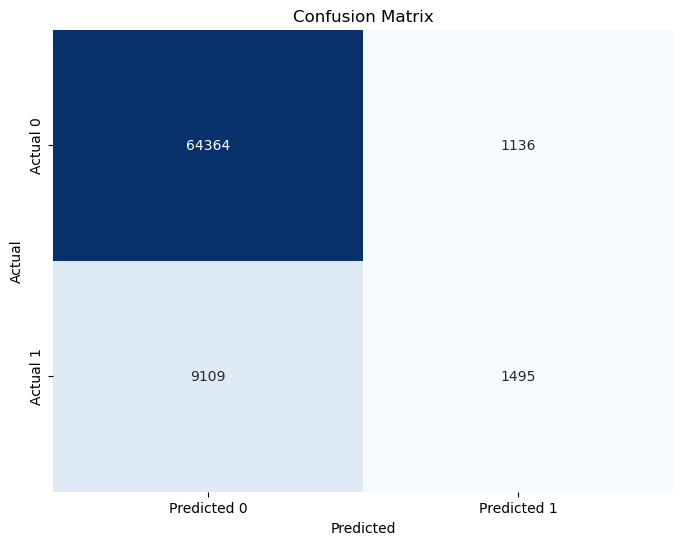

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
y_scores_mlp = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_mlp)
roc_auc = auc(fpr, tpr)

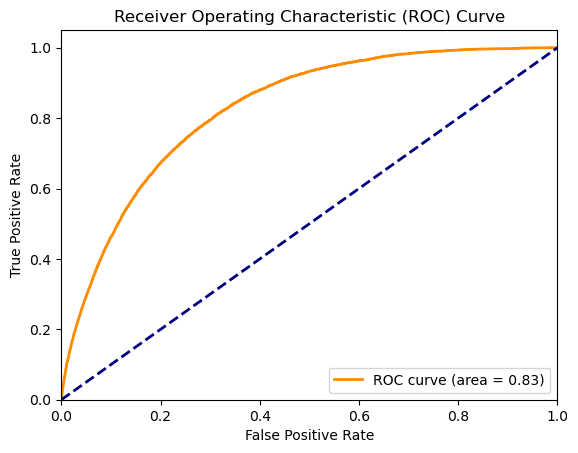

In [29]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_mlp)
average_precision = average_precision_score(y_test, y_scores_mlp)

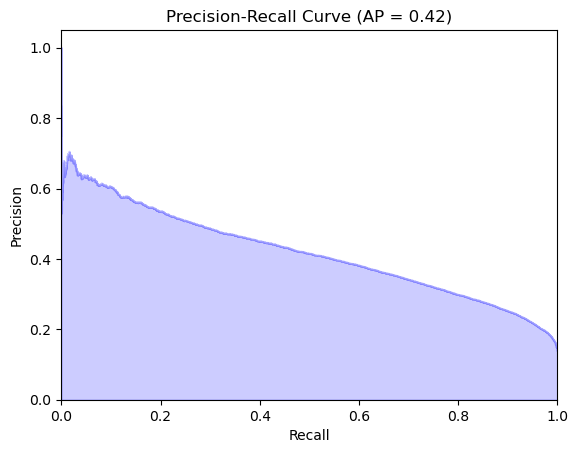

In [32]:
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP = %0.2f)' % average_precision)
plt.show()